2025-07-08 05:48:54.337 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-08 05:48:54.542 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-07-08 05:48:54.547 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-08 05:48:54.551 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-08 05:48:54.600 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-08 05:48:54.602 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-08 05:48:54.605 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-08 05:48:54.611 Thread 'MainThread': mi

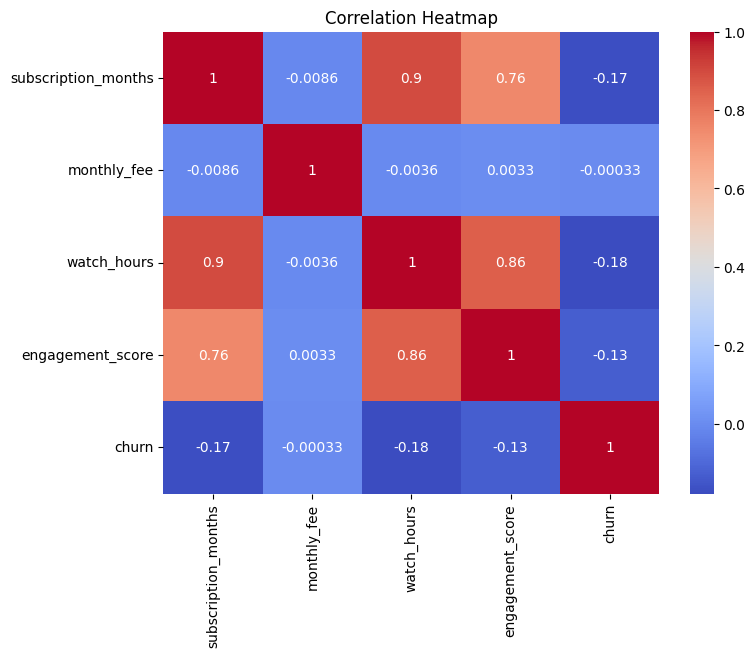

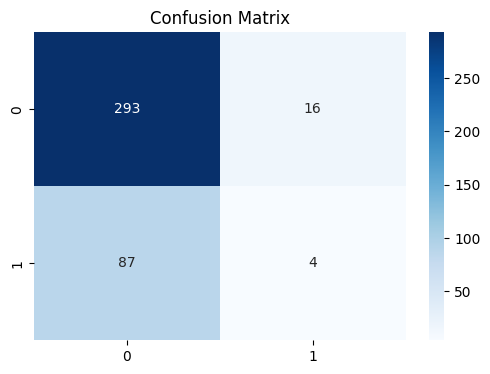

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import streamlit as st

# 1. Load Data
def load_data():
    df = pd.read_csv('streaming_churn.csv')  # From ChatGPT
    df['content_type'] = df['content_type'].astype('category')
    df['device_type'] = df['device_type'].astype('category')
    df['region'] = df['region'].astype('category')
    return df

# 2. Exploratory Data Analysis
def perform_eda(df):
    st.subheader("EDA: Subscriber Drop-Off Insights")
    st.write(f"Churn Rate: {df['churn'].mean():.2%}")
    fig = px.histogram(df, x='watch_hours', color='churn', title='Watch Hours vs Drop-Off')
    st.plotly_chart(fig)
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    plt.figure(figsize=(8, 6))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    st.pyplot(plt)

# 3. Preprocess Data
def preprocess_data(df):
    df_encoded = pd.get_dummies(df, columns=['content_type', 'device_type', 'region'], drop_first=True)
    X = df_encoded.drop(['user_id', 'churn'], axis=1)
    y = df_encoded['churn']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    numeric_cols = ['subscription_months', 'monthly_fee', 'watch_hours', 'engagement_score']
    X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
    X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])
    return X_train, X_test, y_train, y_test, scaler, X.columns

# 4. Train Model
def train_model(X_train, y_train):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    return model

# 5. Evaluate Model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    st.subheader("Model Performance")
    st.write(f"Accuracy: {accuracy_score(y_test, y_pred):.2%}")
    st.write(f"Precision: {precision_score(y_test, y_pred):.2%}")
    st.write(f"Recall: {recall_score(y_test, y_pred):.2%}")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    st.pyplot(plt)

# 6. Feature Importance
def plot_feature_importance(model, columns):
    importance = pd.DataFrame({'Feature': columns, 'Importance': model.feature_importances_})
    fig = px.bar(importance.sort_values('Importance', ascending=False), x='Importance', y='Feature', title='Feature Importance')
    st.plotly_chart(fig)

# 7. Retention Recommendations
def recommend_actions(df, model, scaler, columns):
    st.subheader("Retention Strategy")
    X = pd.get_dummies(df.drop(['user_id', 'churn'], axis=1), columns=['content_type', 'device_type', 'region'], drop_first=True)
    X = X.reindex(columns=columns, fill_value=0)
    numeric_cols = ['subscription_months', 'monthly_fee', 'watch_hours', 'engagement_score']
    X[numeric_cols] = scaler.transform(X[numeric_cols])
    df['churn_risk'] = model.predict_proba(X)[:, 1]
    high_risk = df[df['churn_risk'] > 0.7]
    st.write(f"High-risk users: {len(high_risk)} (offer discounts or trending content!)")

# 8. Streamlit App
def main():
    st.title("Streaming Subscriber Drop-Off Predictor")
    df = load_data()
    perform_eda(df)
    X_train, X_test, y_train, y_test, scaler, columns = preprocess_data(df)
    model = train_model(X_train, y_train)
    evaluate_model(model, X_test, y_test)
    plot_feature_importance(model, columns)
    recommend_actions(df, model, scaler, columns)

if __name__ == "__main__":
    main()

#High subscriber churn

📉 Overall churn rate: 25.00%
💸 Total revenue loss from churned users: $6,221.75


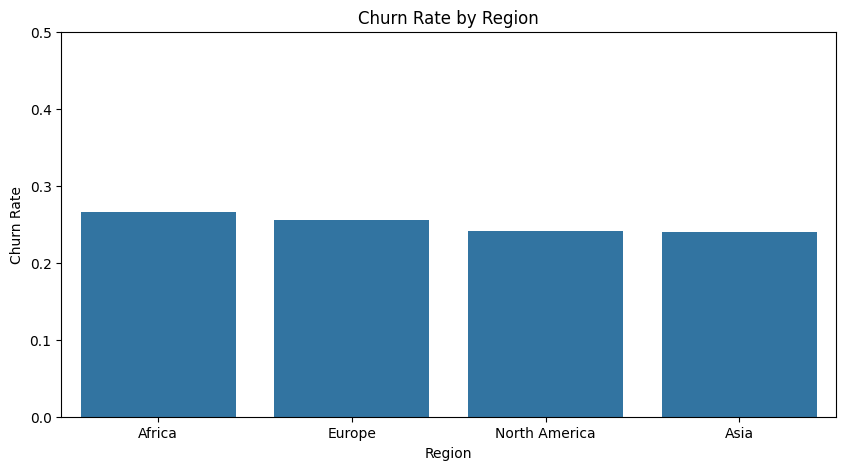

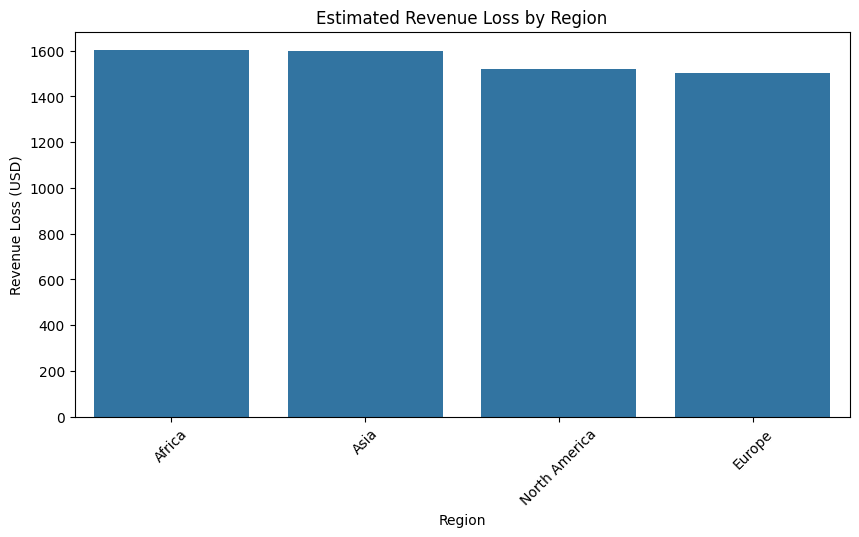

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("streaming_churn.csv")

# Check churn rate
churn_rate = df['churn'].mean()
print(f"📉 Overall churn rate: {churn_rate:.2%}")

# Revenue loss from churned users
df['revenue_loss'] = df['monthly_fee'] * df['churn']
total_revenue_loss = df['revenue_loss'].sum()
print(f"💸 Total revenue loss from churned users: ${total_revenue_loss:,.2f}")

# Churn by region
churn_by_region = df.groupby('region')['churn'].mean().sort_values(ascending=False)
revenue_loss_by_region = df.groupby('region')['revenue_loss'].sum().sort_values(ascending=False)

# Plot churn rate by region
plt.figure(figsize=(10, 5))
sns.barplot(x=churn_by_region.index, y=churn_by_region.values)
plt.title("Churn Rate by Region")
plt.ylabel("Churn Rate")
plt.xlabel("Region")
plt.ylim(0, 0.5)
plt.show()

# Plot revenue loss by region
plt.figure(figsize=(10, 5))
sns.barplot(x=revenue_loss_by_region.index, y=revenue_loss_by_region.values)
plt.title("Estimated Revenue Loss by Region")
plt.ylabel("Revenue Loss (USD)")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.show()


In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 91.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.1 MB/s eta 0:00:00


## Low user Engagement

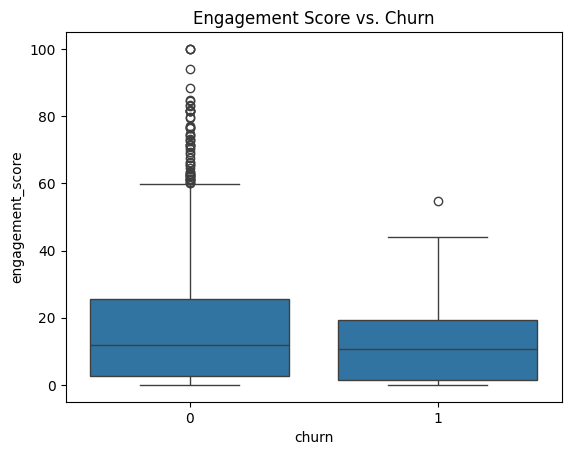

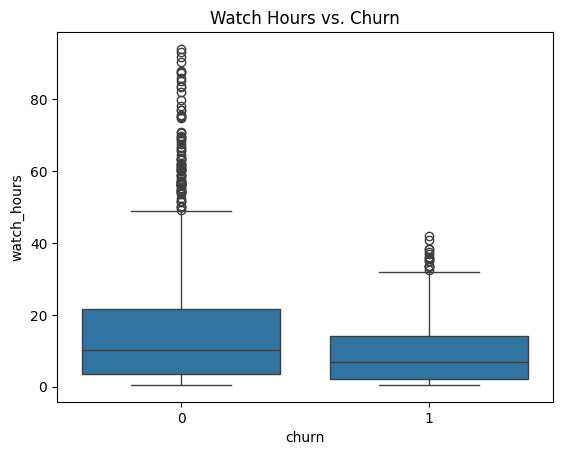

In [ ]:
# Boxplots of engagement and watch hours by churn
sns.boxplot(x="churn", y="engagement_score", data=df)
plt.title("Engagement Score vs. Churn")
plt.show()

sns.boxplot(x="churn", y="watch_hours", data=df)
plt.title("Watch Hours vs. Churn")
plt.show()


## Ineffective  Retention Strategies

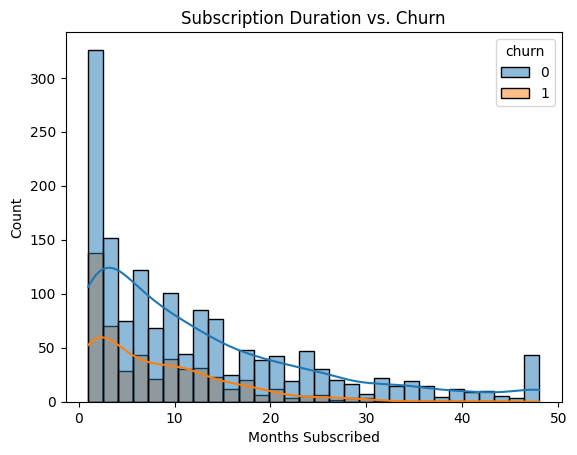

In [ ]:
# Churn vs. subscription_months
sns.histplot(data=df, x='subscription_months', hue='churn', kde=True, bins=30)
plt.title("Subscription Duration vs. Churn")
plt.xlabel("Months Subscribed")
plt.show()


## Suboptimal Content/Pricing Strategies

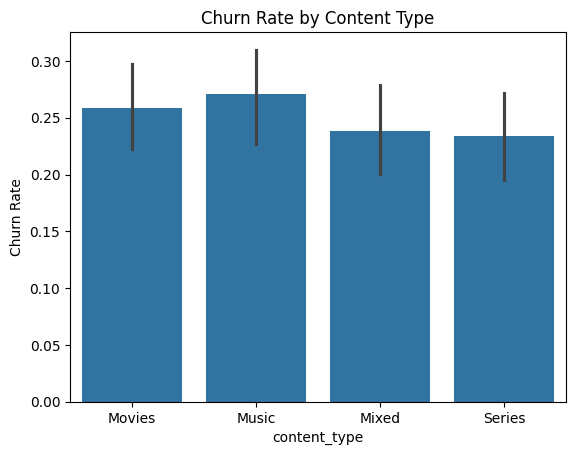

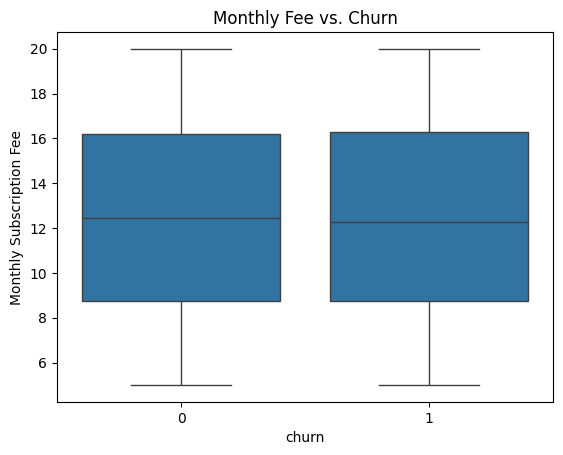

In [ ]:
# Content type vs. churn
sns.barplot(x="content_type", y="churn", data=df)
plt.title("Churn Rate by Content Type")
plt.ylabel("Churn Rate")
plt.show()

# Monthly fee vs. churn
sns.boxplot(x="churn", y="monthly_fee", data=df)
plt.title("Monthly Fee vs. Churn")
plt.ylabel("Monthly Subscription Fee")
plt.show()


## Customer Segmentation Gaps



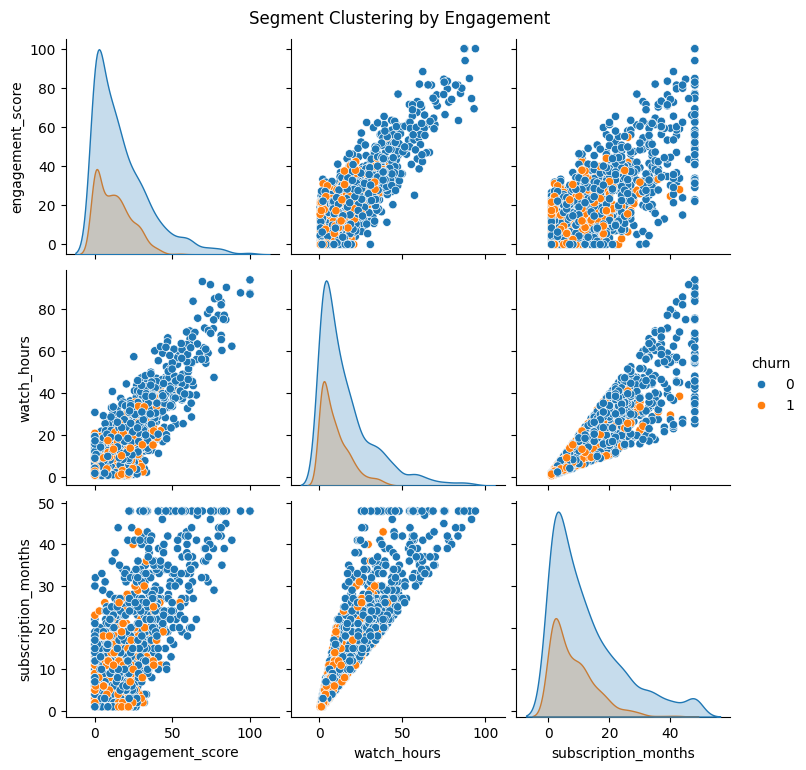

In [ ]:
# Clusterable features: engagement, watch hours, subscription
import seaborn as sns
sns.pairplot(df[['engagement_score', 'watch_hours', 'subscription_months', 'churn']], hue='churn')
plt.suptitle("Segment Clustering by Engagement", y=1.02)
plt.show()


## Inefficient Resource Allocation (Support, Ads)

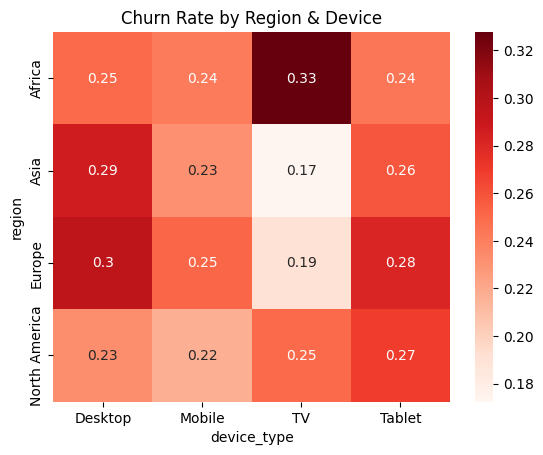

In [ ]:
# Region and device type combination vs. churn
region_device_churn = df.groupby(['region', 'device_type'])['churn'].mean().unstack()

# Heatmap
sns.heatmap(region_device_churn, annot=True, cmap='Reds')
plt.title("Churn Rate by Region & Device")
plt.show()


##Missed Cross-Selling Opportunities

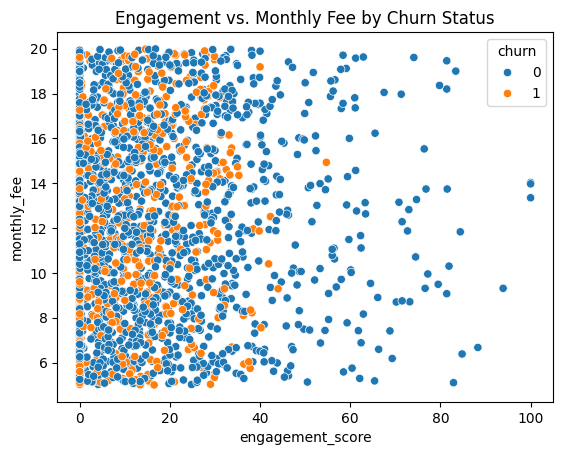

In [ ]:
# Engagement vs. Monthly Fee scatter plot
sns.scatterplot(x='engagement_score', y='monthly_fee', hue='churn', data=df)
plt.title("Engagement vs. Monthly Fee by Churn Status")
plt.show()


In [ ]:
# Load dataset
import pandas as pd
df = pd.read_csv("streaming_churn.csv")

# Churn rate
churn_rate = df['churn'].mean()
print(f"📉 Churn Rate: {churn_rate:.2%}")


📉 Churn Rate: 25.00%


In [ ]:
# Estimated monthly revenue loss
monthly_revenue_loss = df[df['churn'] == 1]['monthly_fee'].sum()
print(f"💸 Estimated Monthly Revenue Loss: ${monthly_revenue_loss:,.2f}")


💸 Estimated Monthly Revenue Loss: $6,221.75


In [ ]:
# Average subscription months
avg_subscription = df['subscription_months'].mean()
print(f"⏱️ Average Subscription Duration: {avg_subscription:.1f} months")


⏱️ Average Subscription Duration: 11.4 months


In [ ]:
# Most used device
top_device = df['device_type'].value_counts().idxmax()
print(f"📺 Top Device Used: {top_device}")


📺 Top Device Used: Mobile


In [ ]:
# Region with highest churn rate
churn_by_region = df.groupby('region')['churn'].mean()
highest_churn_region = churn_by_region.idxmax()
print(f"🌍 Highest Churn Region: {highest_churn_region}")


🌍 Highest Churn Region: Africa


##